In [72]:
print('helloML')

helloML


In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

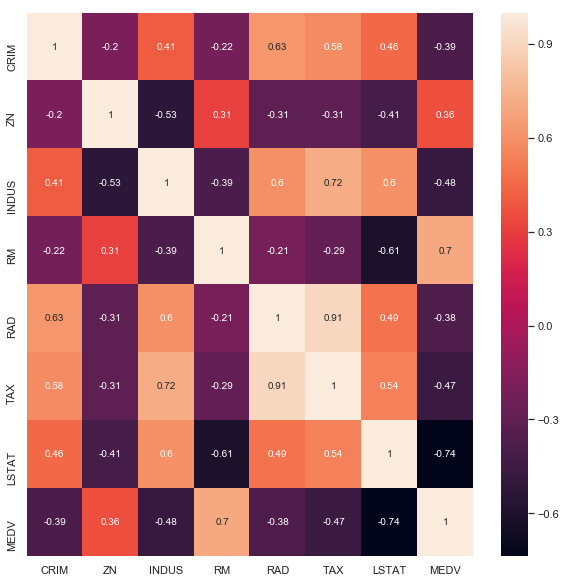

In [94]:
housing = pd.read_csv('housing.data',delim_whitespace=True,header=-1)
housing.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV' ]
plt.figure(figsize=(10,10))
sns.heatmap(housing[['CRIM','ZN','INDUS','RM','RAD','TAX','LSTAT','MEDV' ]].corr(),annot=True)
plt.show()

In [93]:
from sklearn.linear_model import LinearRegression

In [75]:
##select model
##model.fit(reshaped(x),Yasfunction(x))
##use y_pridit = model.predict(reshaped(linspace(x_fit_values)))

In [89]:
x = housing['RM'].values.reshape(-1,1)

In [90]:
y = housing['MEDV'].values

In [91]:
model = LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

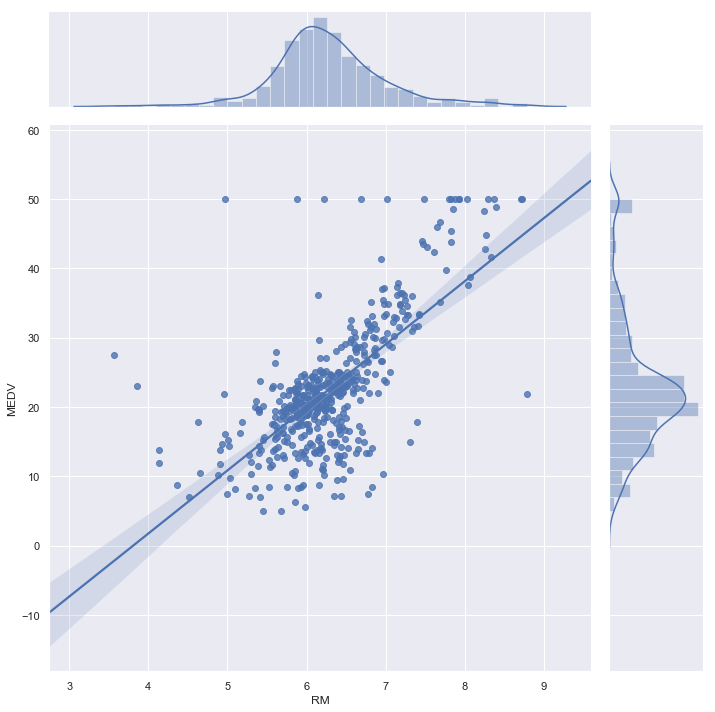

In [92]:
sns.jointplot(x='RM',y='MEDV',data=housing,kind ='reg',height=10)
plt.show()

In [98]:
from sklearn.linear_model import RANSACRegressor

In [99]:
ranModel = RANSACRegressor()

In [101]:
ranModel.fit(x,y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_threshold=None,
        stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [104]:
inMask = ranModel.inlier_mask_
outMask = np.logical_not(inMask)